## **Log-normal distribution to the tips data and visualize**

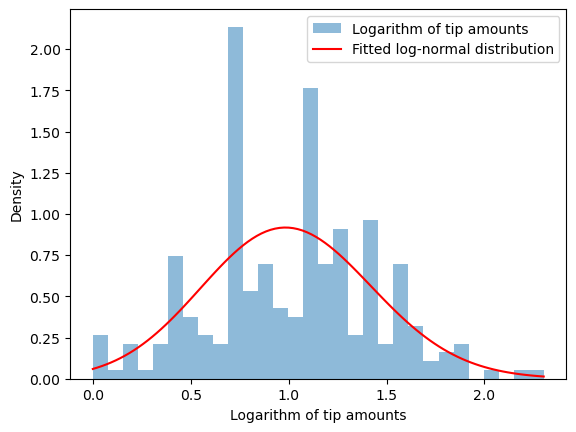

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import lognorm

tips = sns.load_dataset('tips')

# Calculate the logarithm of the tip amounts
tips['log_tip'] = np.log(tips['tip'])

# Fit a log-normal distribution to the logarithm of the tip amounts
s, loc, scale = lognorm.fit(tips['log_tip'])

# Plot the histogram of the logarithm of the tip amounts, along with the fitted log-normal distribution
plt.hist(tips['log_tip'], density=True, bins=30, alpha=0.5, label='Logarithm of tip amounts')
x = np.linspace(tips['log_tip'].min(), tips['log_tip'].max(), 100)
plt.plot(x, lognorm.pdf(x, s, loc, scale), 'r-', label='Fitted log-normal distribution')
plt.xlabel('Logarithm of tip amounts')
plt.ylabel('Density')
plt.legend()
plt.show()


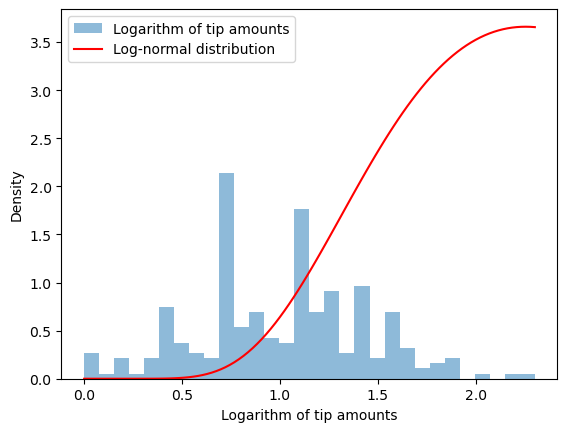

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import erf

tips = sns.load_dataset('tips')

# Calculate the logarithm of the tip amounts
log_tip = np.log(tips['tip'])

# Calculate the mean and standard deviation of the logarithm of the tip amounts
mu = np.mean(log_tip)
sigma = np.std(log_tip)

# Define the log-normal distribution using the calculated mean and standard deviation
# add small positive value to exclude zero
x = np.linspace(log_tip.min()+0.001, log_tip.max(), 100)
pdf = (1 / (x * sigma * np.sqrt(2*np.pi))) * np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2))

# Normalize the PDF using the error function
cdf = 0.5 * (1 + erf((np.log(x) - mu) / (np.sqrt(2) * sigma)))
pdf /= np.trapz(pdf, x=cdf)

# Plot the histogram of the logarithm of the tip amounts, along with the defined log-normal distribution
plt.hist(log_tip, density=True, bins=30, alpha=0.5, label='Logarithm of tip amounts')
plt.plot(x, pdf, 'r-', label='Log-normal distribution')
plt.xlabel('Logarithm of tip amounts')
plt.ylabel('Density')
plt.legend()
plt.show()

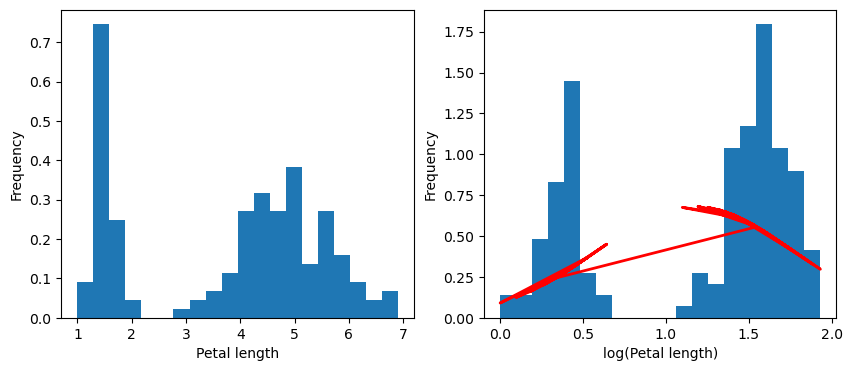

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm

# load iris dataset
iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
                   names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])

# extract petal length values
petal_length = iris['petal_length'].values

# plot histogram and PDF of petal length values
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

ax1.hist(petal_length, bins=20, density=True)
ax1.set_xlabel('Petal length')
ax1.set_ylabel('Frequency')

ax2.hist(np.log(petal_length), bins=20, density=True)
ax2.set_xlabel('log(Petal length)')
ax2.set_ylabel('Frequency')

# fit and plot PDF of log-normal distribution
s, loc, scale = lognorm.fit(np.log(petal_length))
pdf = lognorm.pdf(np.log(petal_length), s, loc, scale)
ax2.plot(np.log(petal_length), pdf, 'r-', lw=2)

plt.show()
